In [1]:
# import all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('college_datav3.csv')
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


In [3]:
df.columns

Index(['INSTNM', 'OPEID', 'REGION', 'SAT_AVG_ALL', 'PCTPELL', 'PCTFLOAN',
       'ADM_RATE_ALL', 'UG', 'AVGFACSAL', 'COMPL_RPY_5YR_RT', 'DEBT_MDN',
       'MEDIAN_HH_INC', 'ICLEVEL', 'HIGHDEG', 'CONTROL', 'WOMENONLY',
       'MENONLY', 'LOCALE', 'Tuition', 'Degree_Type', 'Ownership', 'Regions',
       'Locales', 'Locale_Short'],
      dtype='object')

In [4]:
df['HIGHDEG'].unique()

array([4, 2, 3, 1, 0], dtype=int64)

## FacetGrid Categorical Example

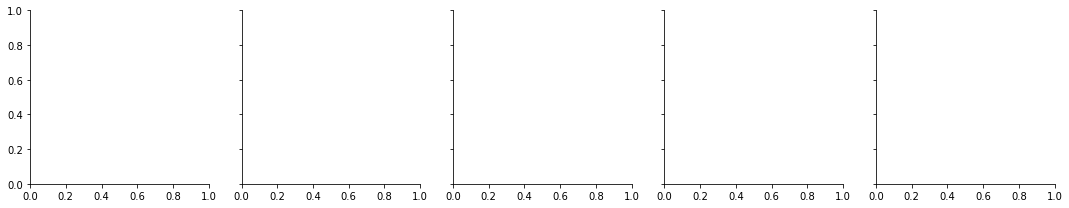

In [5]:
g = sns.FacetGrid(df, col='HIGHDEG')

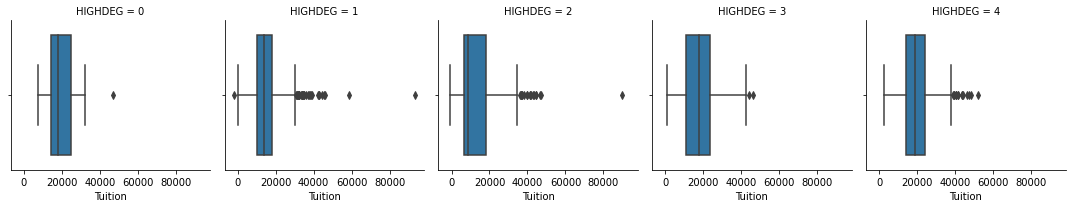

In [6]:
g = sns.FacetGrid(df, col='HIGHDEG')
g.map(sns.boxplot, 'Tuition', order=['0', '1', '2', '3', '4'])
plt.show()

## factorplot() (updated to catplot())
 - The factorplot is a simpler way to use a FacetGrid for categorical data
 - Combines the facetting and mapping process into one function

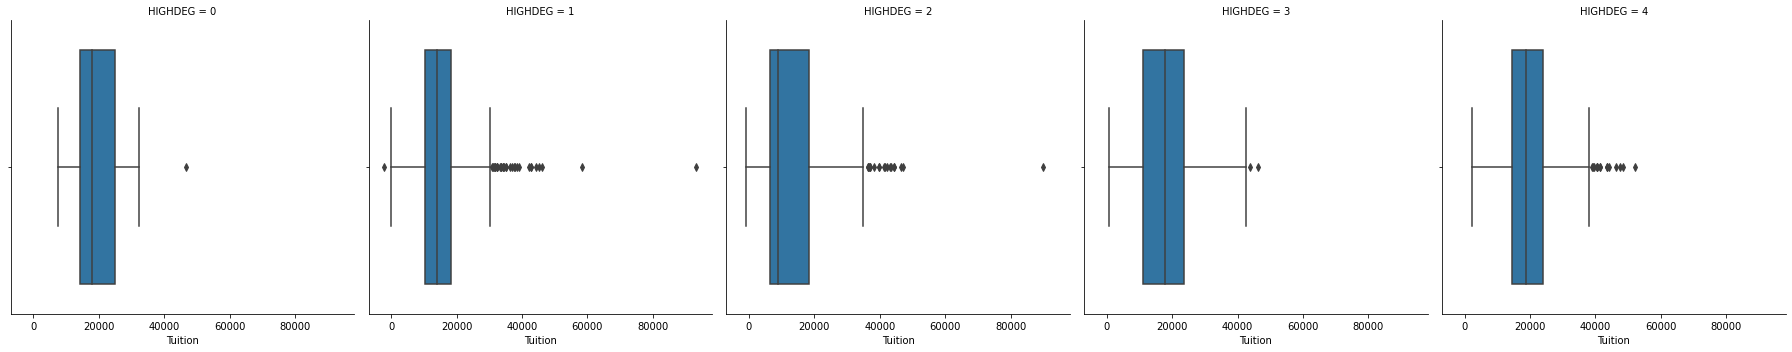

In [7]:
sns.factorplot(x='Tuition', data=df, col='HIGHDEG', kind='box')
plt.show()

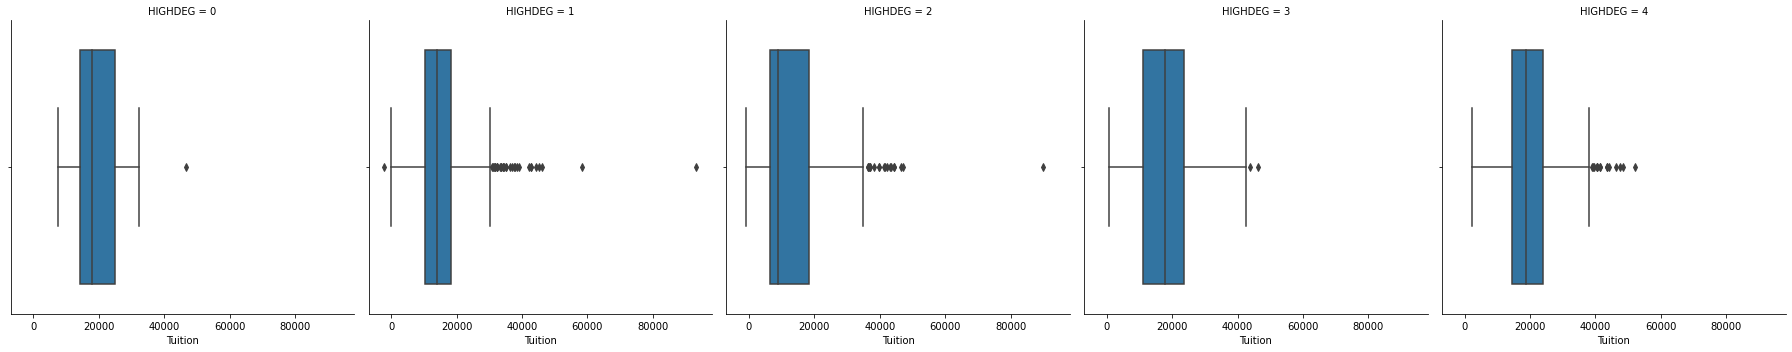

In [8]:
sns.catplot(x='Tuition', data=df, col='HIGHDEG', kind='box')
plt.show()

## FacetGrid for regression

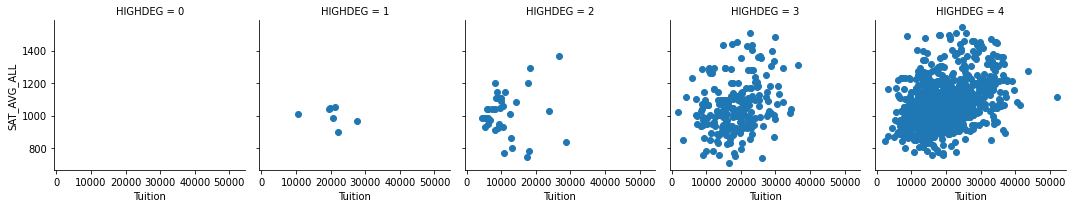

In [9]:
g = sns.FacetGrid(df, col='HIGHDEG')
g.map(plt.scatter, 'Tuition', 'SAT_AVG_ALL')
plt.show()

## lmplot
 - lmplot plots scatter and regression plots on a FacetGrid

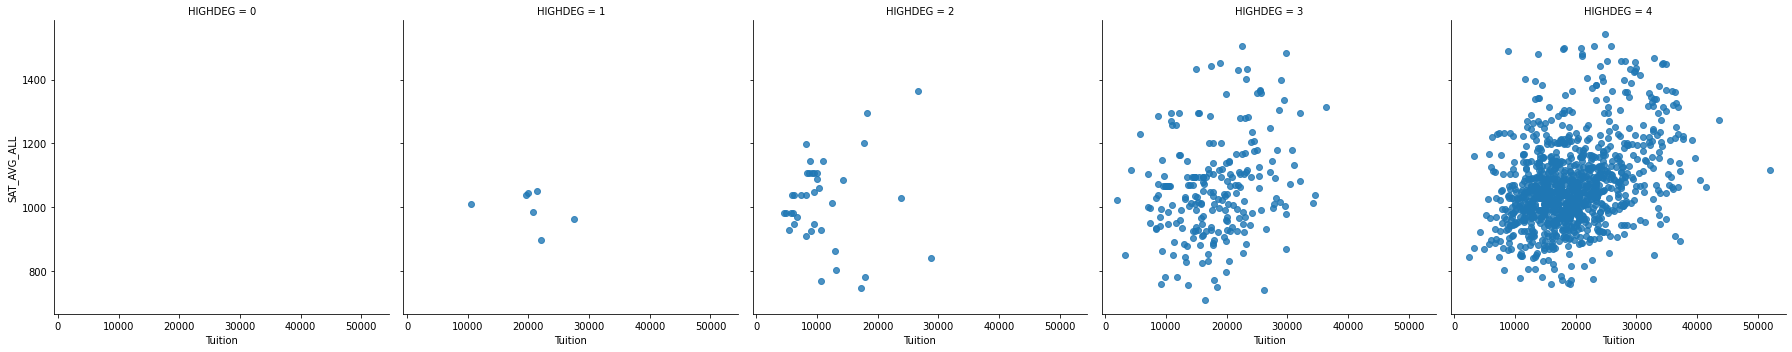

In [10]:
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL', col='HIGHDEG', fit_reg=False)
plt.show()

## lmplot with regression

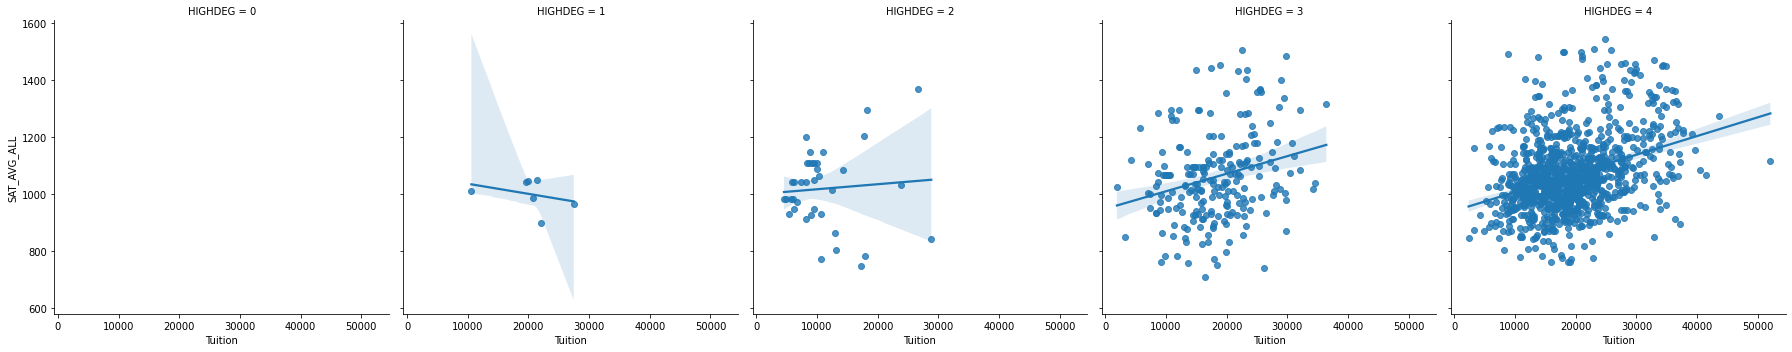

In [11]:
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL', col='HIGHDEG')
plt.show()

## Exercises

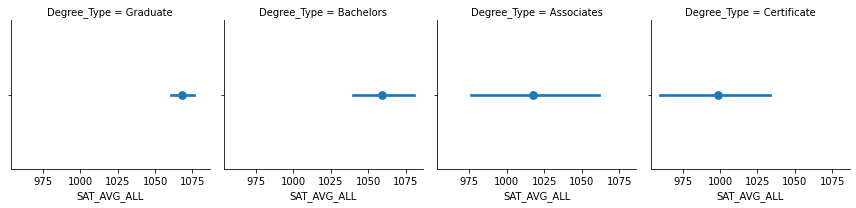

In [12]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             col="Degree_Type",
             col_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()

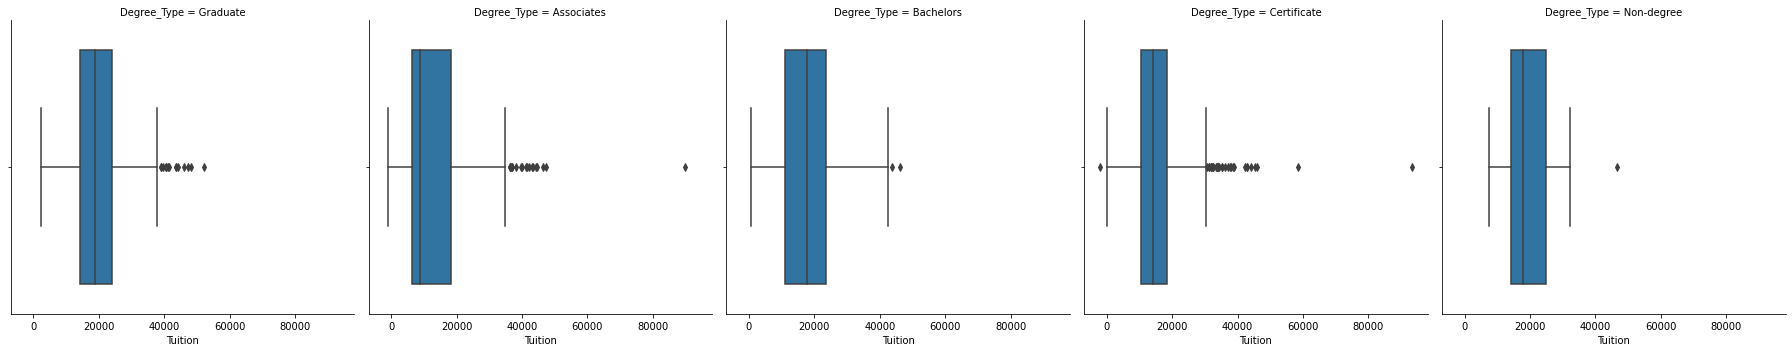

In [13]:
# Create a factor plot that contains boxplots of Tuition values
sns.factorplot(data=df,
         x='Tuition',
         kind='box',
         col='Degree_Type')

plt.show()

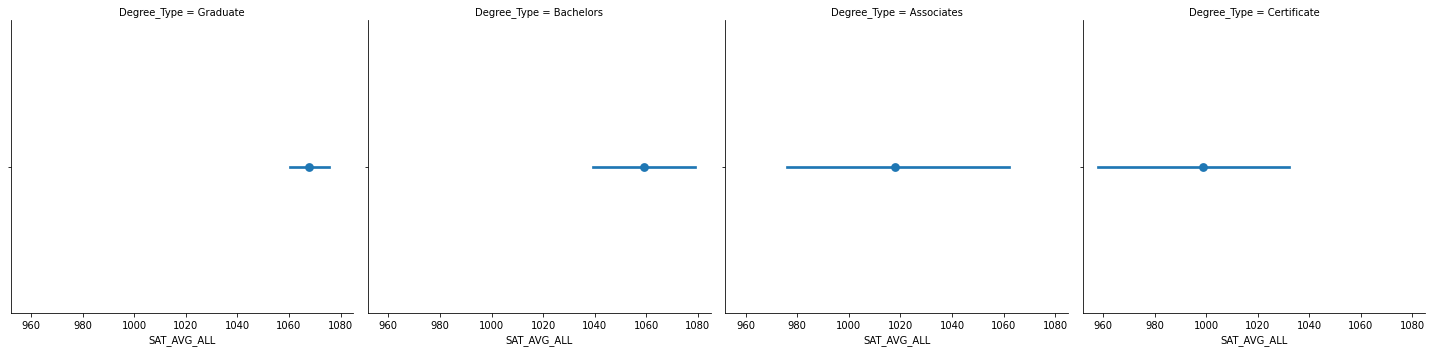

In [14]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.factorplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        col='Degree_Type',
        col_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()

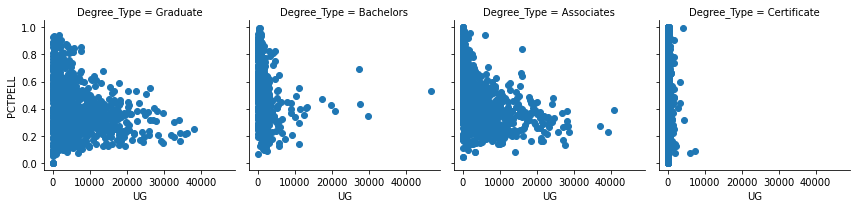

In [15]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()

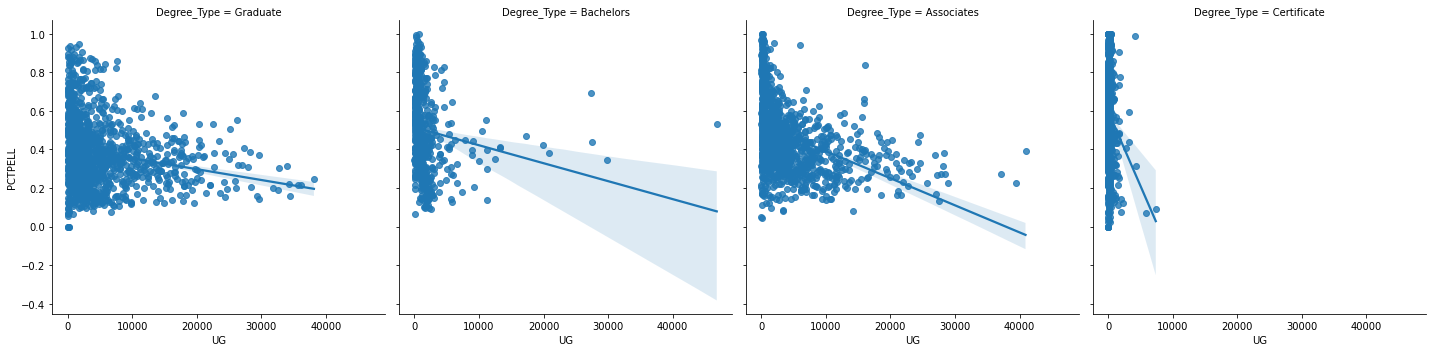

In [16]:
# Re-create the previous plot as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()

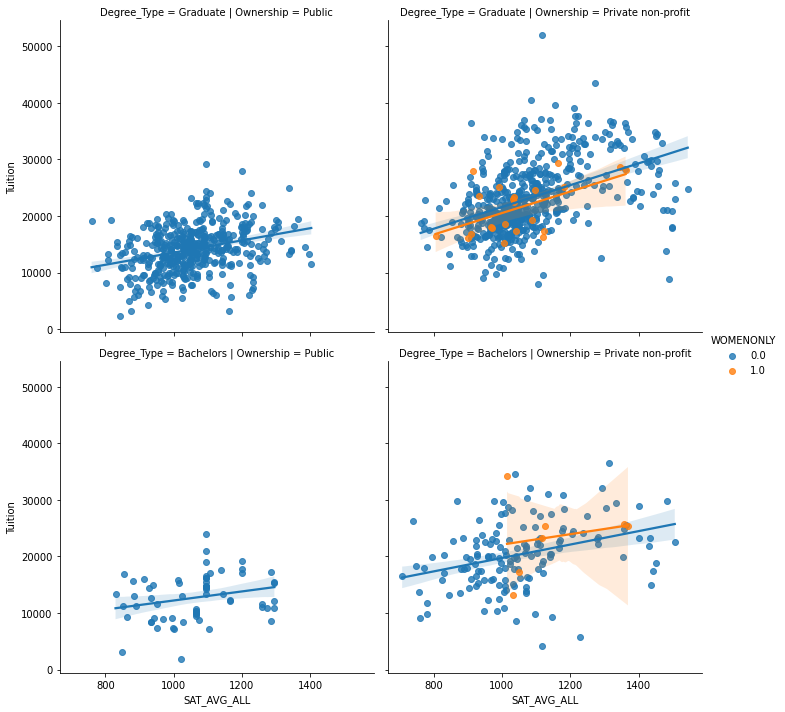

In [17]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=['Public', 'Private non-profit'])

plt.show()

# Using PairGrid and pairplot

In [18]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Creating a PairGrid
 - The PairGrid follows similar API to FacetGrid

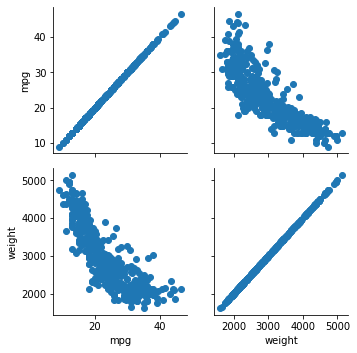

In [19]:
g = sns.PairGrid(mpg, vars=['mpg', 'weight'])
g = g.map(plt.scatter)
plt.show()

## Customizing the PairGrid diagonals

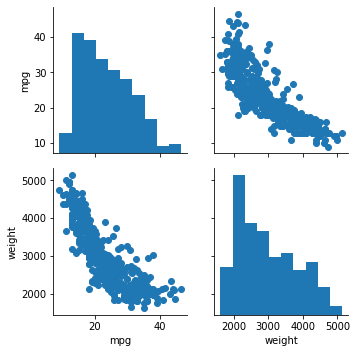

In [20]:
g = sns.PairGrid(mpg, vars=['mpg', 'weight'])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()

## Pairplot
 - pairplot is a shortcut for PairGrid

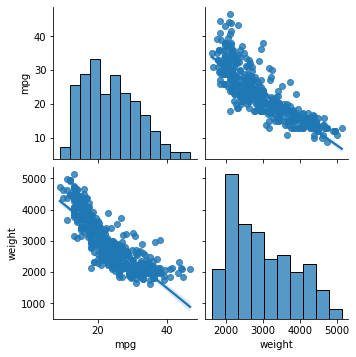

In [21]:
sns.pairplot(mpg, vars=['mpg', 'weight'], kind='reg', diag_kind='hist')
plt.show()

## Customizing a pairplot

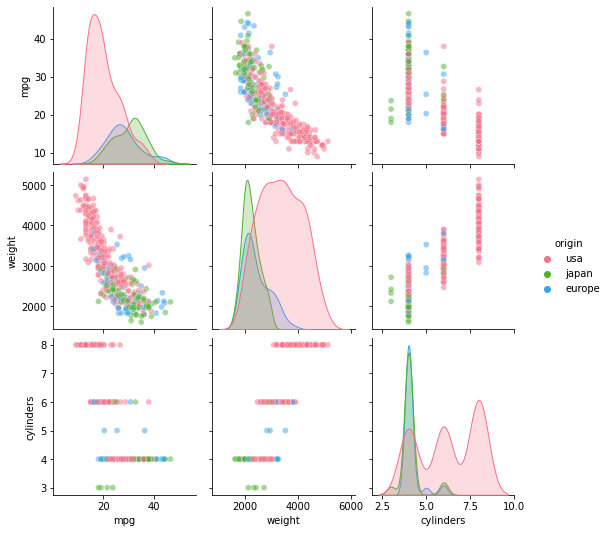

In [22]:
sns.pairplot(mpg, vars=['mpg', 'weight', 'cylinders'], 
             hue='origin', palette='husl', plot_kws={'alpha': 0.5})
plt.show()

## Exercises

In [23]:
df = pd.read_csv('insurance_premiums.csv')
df.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


In [24]:
df.columns

Index(['State', 'fatal_collisions', 'fatal_collisions_speeding',
       'fatal_collisions_alc', 'fatal_collisions_not_distracted',
       'fatal_collisions_no_hist', 'premiums', 'insurance_losses', 'Region'],
      dtype='object')

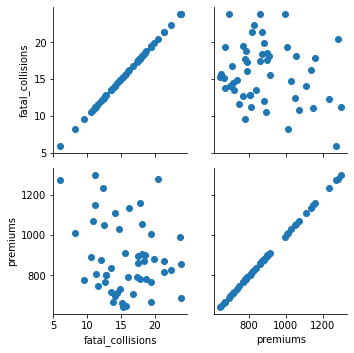

In [25]:
# Create a PairGrid with a scatter plot for fatal_collisions and premiums
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map(plt.scatter)

plt.show()

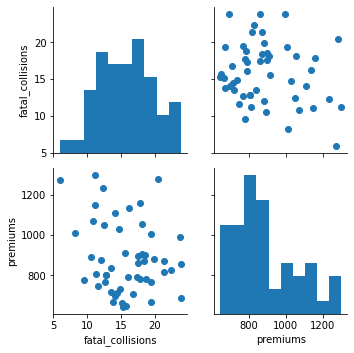

In [26]:
# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()

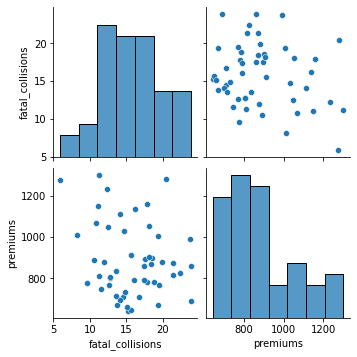

In [27]:
# Create a pairwise plot of the variables using a scatter plot
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter')

plt.show()

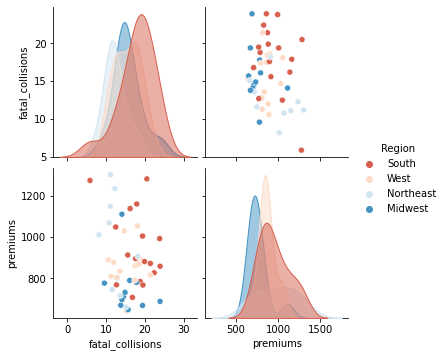

In [28]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()

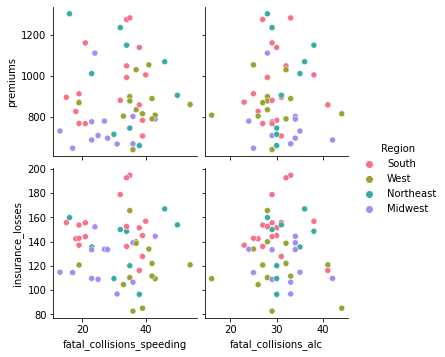

In [29]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()

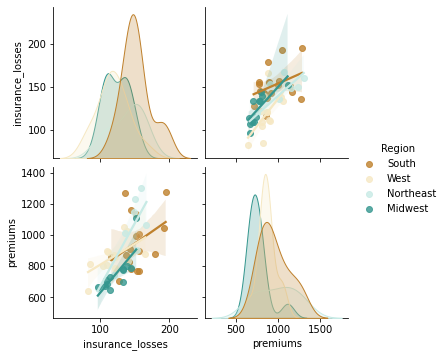

In [30]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()

# Using JointGrid and jointplot

In [31]:
df = pd.read_csv('college_datav3.csv')
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


In [32]:
df.columns

Index(['INSTNM', 'OPEID', 'REGION', 'SAT_AVG_ALL', 'PCTPELL', 'PCTFLOAN',
       'ADM_RATE_ALL', 'UG', 'AVGFACSAL', 'COMPL_RPY_5YR_RT', 'DEBT_MDN',
       'MEDIAN_HH_INC', 'ICLEVEL', 'HIGHDEG', 'CONTROL', 'WOMENONLY',
       'MENONLY', 'LOCALE', 'Tuition', 'Degree_Type', 'Ownership', 'Regions',
       'Locales', 'Locale_Short'],
      dtype='object')

## Basic JointGrid

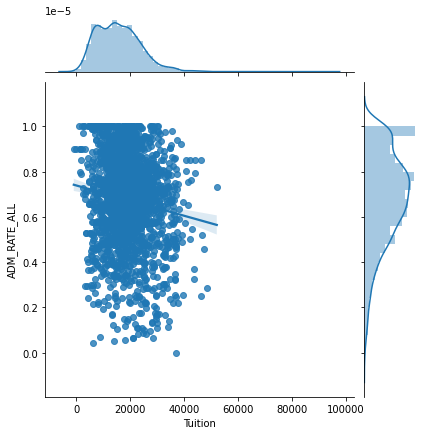

In [33]:
g = sns.JointGrid(data=df, x='Tuition', y='ADM_RATE_ALL')
g.plot(sns.regplot, sns.distplot)
plt.show()

## Advancded JointGrid

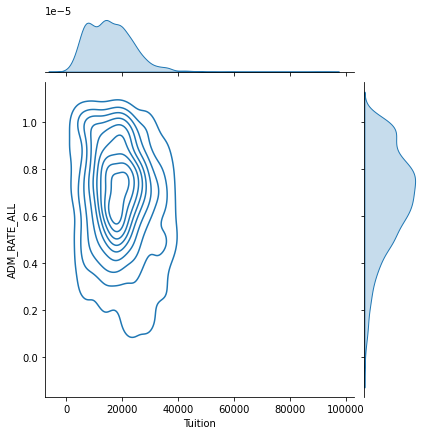

In [34]:
g = sns.JointGrid(data=df, x='Tuition', y='ADM_RATE_ALL')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)
# g = g.annotate(stats.pearsonr)
plt.show()

## jointplot()

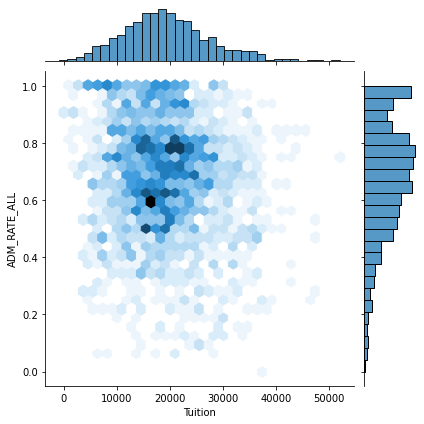

In [35]:
sns.jointplot(data=df, x='Tuition', y='ADM_RATE_ALL', kind='hex')
plt.show()

## Customizing a jointplot

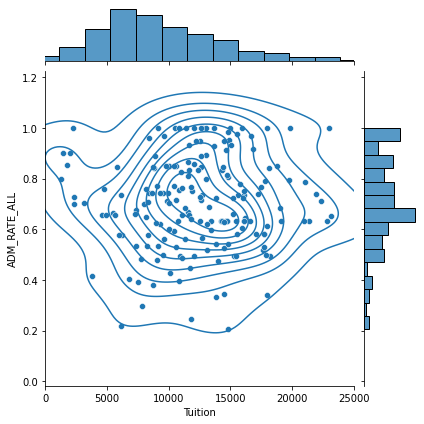

In [36]:
g = (sns.jointplot(x='Tuition', 
                   y='ADM_RATE_ALL', 
                   kind='scatter', 
                   xlim=(0, 25000),
                   marginal_kws=dict(bins=15, rug=True),
                   data=df.query('UG < 2500 & Ownership =="Public"'))
    .plot_joint(sns.kdeplot))
plt.show()

## Exercises

In [37]:
df = pd.read_csv('bike_share.csv', parse_dates=['dteday'])
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


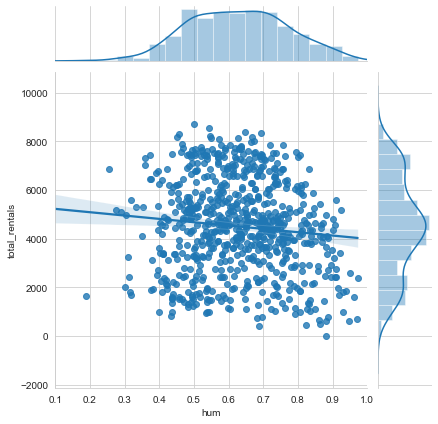

In [38]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()

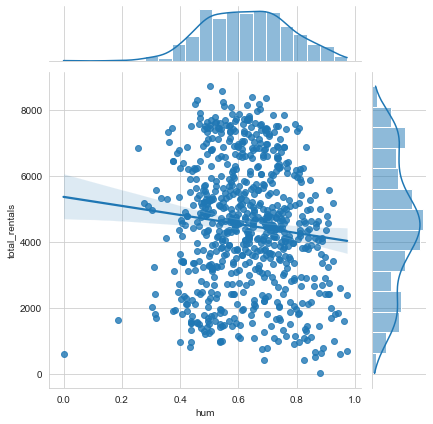

In [39]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()

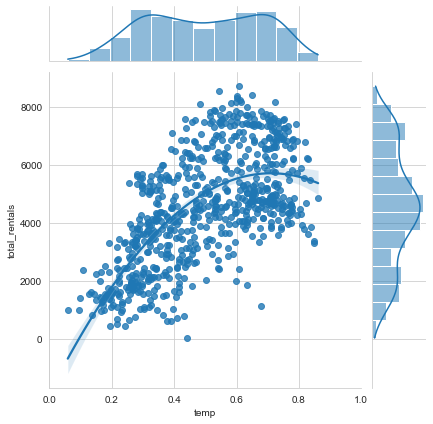

In [40]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()

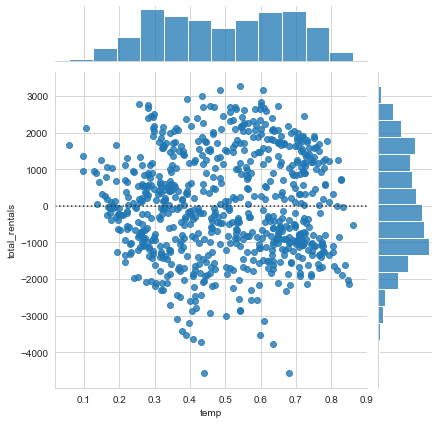

In [41]:
# Plot a jointplot showing the residuals
sns.jointplot(x="temp",
        y="total_rentals",
        kind='resid',
        data=df,
        order=2)

plt.show()

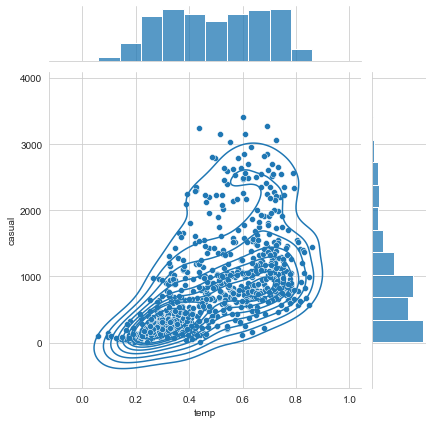

In [42]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()

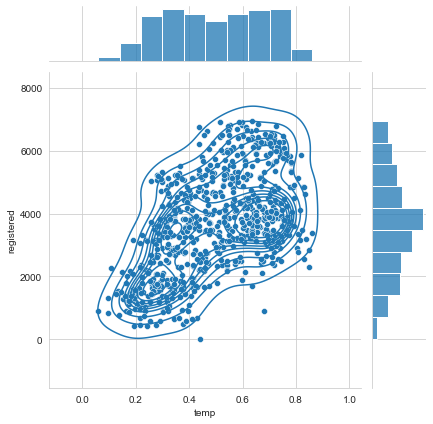

In [43]:
# Replicate the previous plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()